# Librerias utilizadas

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import wget
from scipy.io import loadmat
from IPython.display import clear_output
from os import path

# Descarga de datasets

In [36]:
# Collab
# !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true
# !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true
# !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true
# !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true
# clear_output()

# Jupyter
cont_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true'
if not path.exists('Contaminated_Data.mat'):
    cont_data_file = wget.download(cont_data_url)
else:
    print('Already Downloaded File')
    cont_data_file = 'Contaminated_Data.mat'
pure_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true'
if not path.exists('Pure_Data.mat'):
    pure_data_file = wget.download(pure_data_url)
else:
    print('Already Downloaded File')
    pure_data_file = 'Pure_Data.mat'
heog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true'
if not path.exists('HEOG.mat'):
    heog_file = wget.download(heog_url)
else:
    print('Already Downloaded File')
    heog_file = 'HEOG.mat'
veog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true'
if not path.exists('VEOG.mat'):
    veog_file = wget.download(veog_url)
else:
    print('Already Downloaded File')
    veog_file = 'VEOG.mat'

Already Downloaded File
Already Downloaded File
Already Downloaded File
Already Downloaded File


# Visualizacion de datos

In [38]:
def RemoveKeys(dict_):
    new_dict = dict_.copy()
    new_dict.pop('__header__')
    new_dict.pop('__version__')
    new_dict.pop('__globals__')
    return  new_dict

def AddPlot(signal, n_rows, n_cols, index, title):
    plt.subplot(n_rows,n_cols,index)
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)

## EEG pura

dict_keys(['sim1_resampled', 'sim2_resampled', 'sim3_resampled', 'sim4_resampled', 'sim5_resampled', 'sim6_resampled', 'sim7_resampled', 'sim8_resampled', 'sim9_resampled', 'sim10_resampled', 'sim11_resampled', 'sim12_resampled', 'sim13_resampled', 'sim14_resampled', 'sim15_resampled', 'sim16_resampled', 'sim17_resampled', 'sim18_resampled', 'sim19_resampled', 'sim20_resampled', 'sim21_resampled', 'sim22_resampled', 'sim23_resampled', 'sim24_resampled', 'sim25_resampled', 'sim26_resampled', 'sim27_resampled', 'sim28_resampled', 'sim29_resampled', 'sim30_resampled', 'sim31_resampled', 'sim32_resampled', 'sim33_resampled', 'sim34_resampled', 'sim35_resampled', 'sim36_resampled', 'sim37_resampled', 'sim38_resampled', 'sim39_resampled', 'sim40_resampled', 'sim41_resampled', 'sim42_resampled', 'sim43_resampled', 'sim44_resampled', 'sim45_resampled', 'sim46_resampled', 'sim47_resampled', 'sim48_resampled', 'sim49_resampled', 'sim50_resampled', 'sim51_resampled', 'sim52_resampled', 'sim53_res

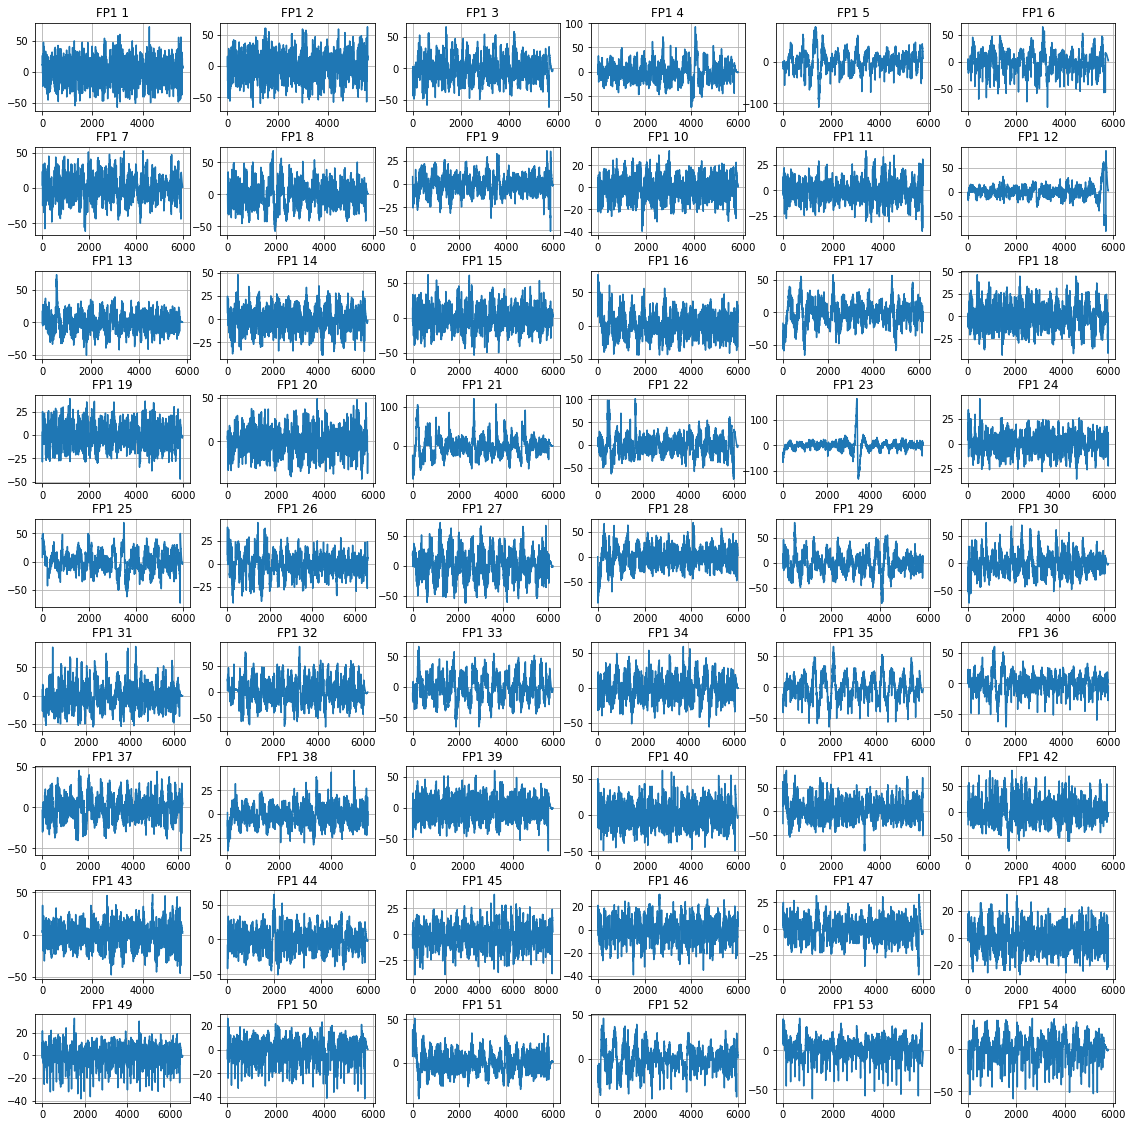

In [40]:
# Collab
# clean_dict = loadmat("Pure_Data.mat?raw=true")
# Jupyter
clean_dict = loadmat(pure_data_file)

new_clean = RemoveKeys(clean_dict)
print(new_clean.keys())
clean_list = [new_clean[eeg] for eeg in new_clean.keys()]
c_shapes = [ clean_list[i].shape[1] for i in range(0,len(clean_list))]
print("len clean_list: " + str( len(clean_list) ) )
print("numero de canales eeg por elemento de la lista: "+str( clean_list[0].shape[0] ))
print("len de clean mas larga: "+str( np.amax(c_shapes) ))
print("len de clean mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(clean_list)):
    AddPlot(clean_list[i][0], 9, 6, i+1, "FP1 "+str(i+1))
plt.show()

## VEOG

dict_keys(['veog_1', 'veog_2', 'veog_3', 'veog_4', 'veog_5', 'veog_6', 'veog_7', 'veog_8', 'veog_9', 'veog_10', 'veog_11', 'veog_12', 'veog_13', 'veog_14', 'veog_15', 'veog_16', 'veog_17', 'veog_18', 'veog_19', 'veog_20', 'veog_21', 'veog_22', 'veog_23', 'veog_24', 'veog_25', 'veog_26', 'veog_27', 'veog_28', 'veog_29', 'veog_30', 'veog_31', 'veog_32', 'veog_33', 'veog_34', 'veog_35', 'veog_36', 'veog_37', 'veog_38', 'veog_39', 'veog_40', 'veog_41', 'veog_42', 'veog_43', 'veog_44', 'veog_45', 'veog_46', 'veog_47', 'veog_48', 'veog_49', 'veog_50', 'veog_51', 'veog_52', 'veog_53', 'veog_54'])
len veog_list: 54
len de veog mas larga: 8401
len de veog mas corta: 5401


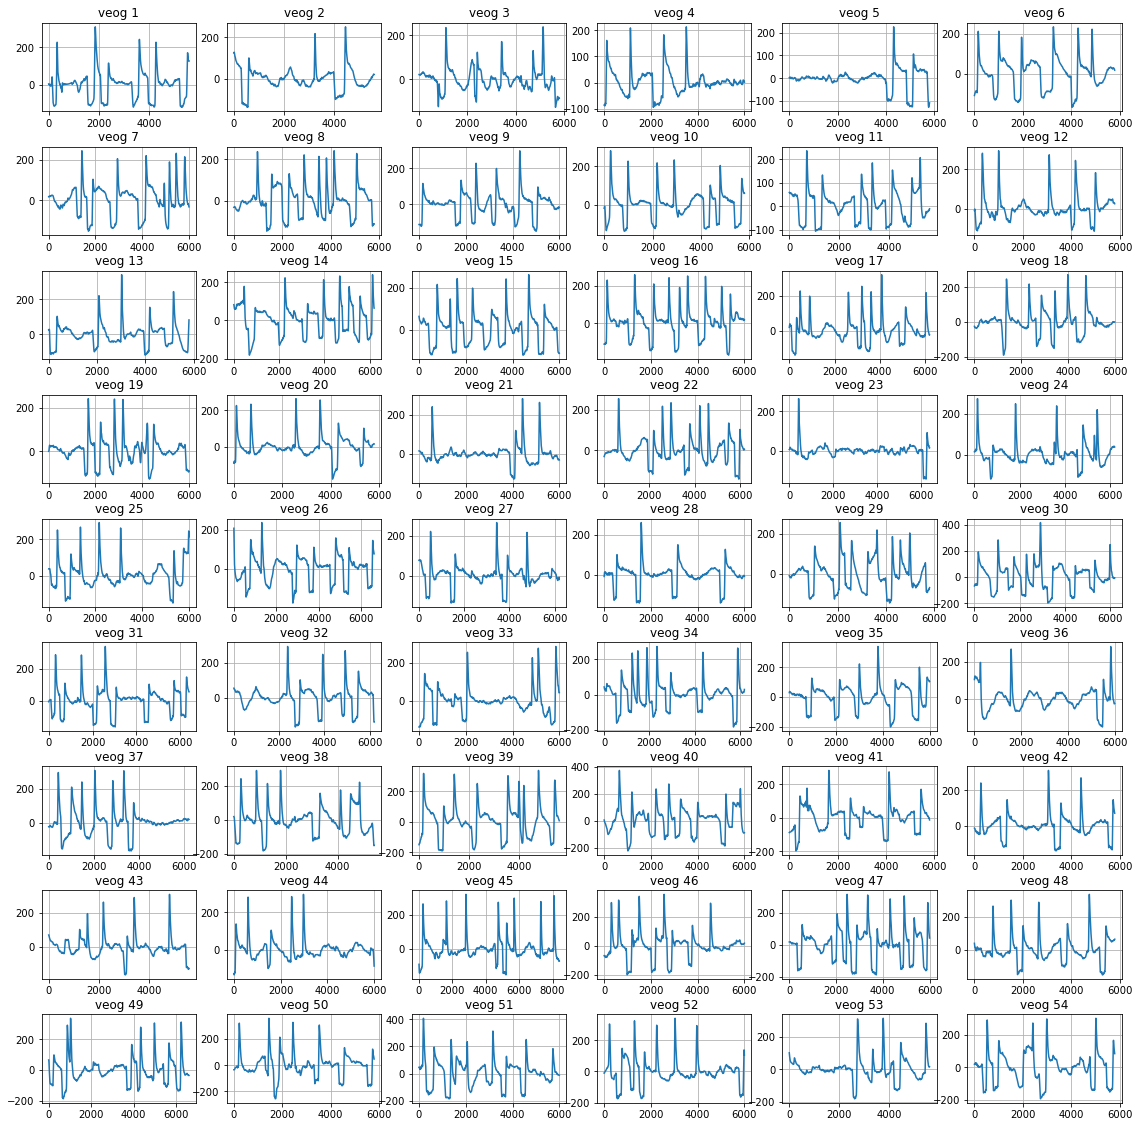

In [41]:
# Collab
# veog_dict = loadmat("VEOG.mat?raw=true")
# Jupyter
veog_dict = loadmat(veog_file)

keys = [veog_dict.keys()]
new_veog = RemoveKeys(veog_dict)
print(new_veog.keys())
veog_list = [new_veog[veog] for veog in new_veog.keys()]
v_shapes = [ veog_list[i].shape[1] for i in range(0,len(veog_list))]
print("len veog_list: " + str( len(veog_list) ) )
print("len de veog mas larga: "+str( np.amax(v_shapes) ))
print("len de veog mas corta: "+str( np.amin(v_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(veog_list)):
    AddPlot(veog_list[i][0], 9, 6, i+1, "veog "+str(i+1))
plt.show()


## HEOG

dict_keys(['heog_1', 'heog_2', 'heog_3', 'heog_4', 'heog_5', 'heog_6', 'heog_7', 'heog_8', 'heog_9', 'heog_10', 'heog_11', 'heog_12', 'heog_13', 'heog_14', 'heog_15', 'heog_16', 'heog_17', 'heog_18', 'heog_19', 'heog_20', 'heog_21', 'heog_22', 'heog_23', 'heog_24', 'heog_25', 'heog_26', 'heog_27', 'heog_28', 'heog_29', 'heog_30', 'heog_31', 'heog_32', 'heog_33', 'heog_34', 'heog_35', 'heog_36', 'heog_37', 'heog_38', 'heog_39', 'heog_40', 'heog_41', 'heog_42', 'heog_43', 'heog_44', 'heog_45', 'heog_46', 'heog_47', 'heog_48', 'heog_49', 'heog_50', 'heog_51', 'heog_52', 'heog_53', 'heog_54'])
len heog_list: 54
len de heog mas larga: 8401
len de heog mas corta: 5401


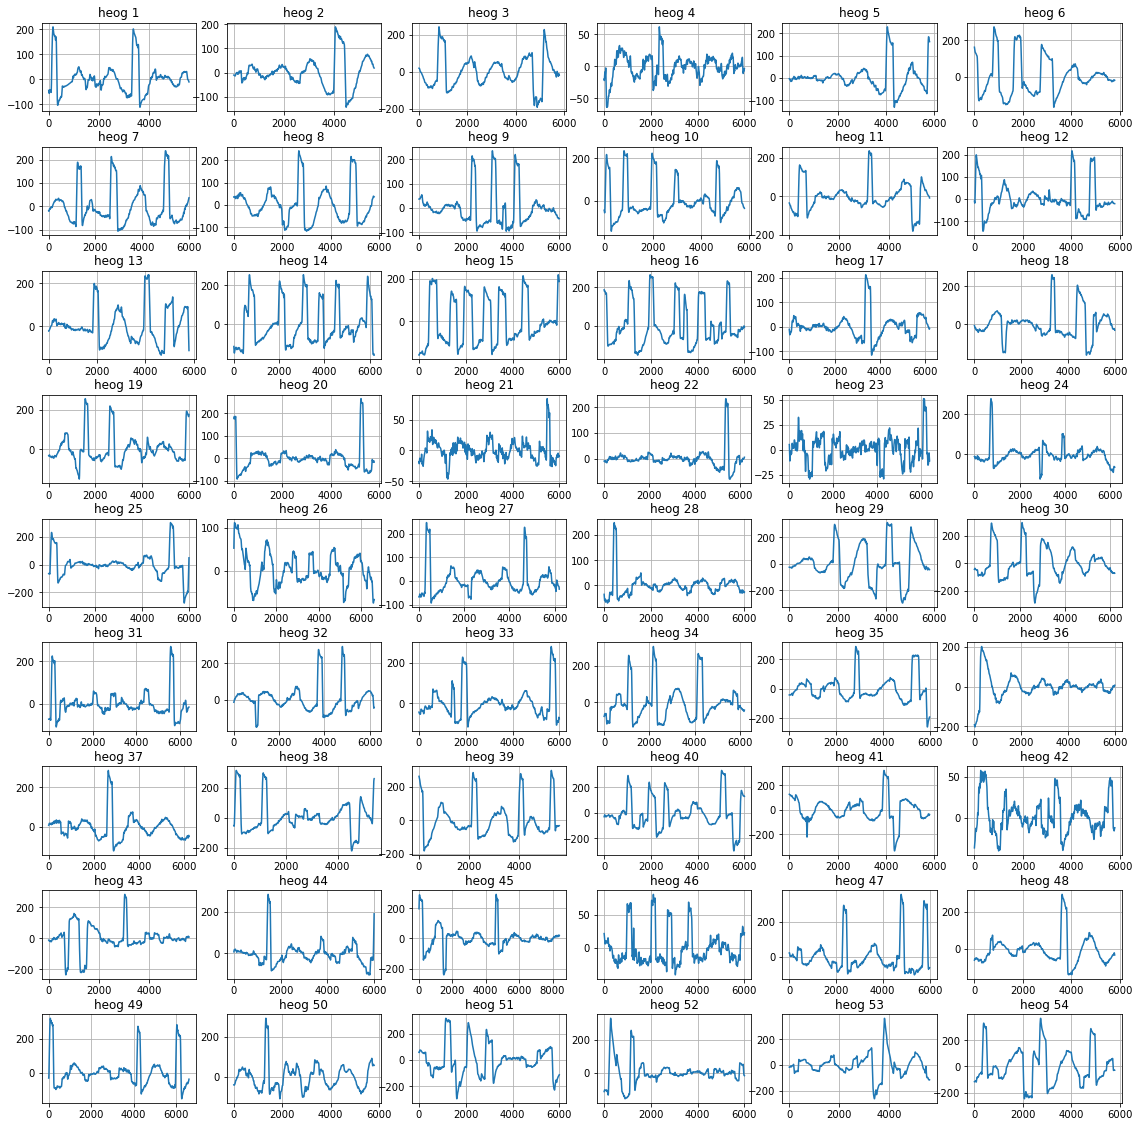

In [42]:
# Collab
# heog_dict = loadmat("HEOG.mat?raw=true")
# Jupyter
heog_dict = loadmat(heog_file)

new_heog = RemoveKeys(heog_dict)
print(new_heog.keys())
heog_list = [new_heog[heog] for heog in new_heog.keys()]
h_shapes = [ heog_list[i].shape[1] for i in range(0,len(heog_list))]
print("len heog_list: " + str( len(heog_list) ) )
print("len de heog mas larga: "+str( np.amax(h_shapes) ))
print("len de heog mas corta: "+str( np.amin(h_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(heog_list)):
    AddPlot(heog_list[i][0], 9, 6, i+1, "heog "+str(i+1))
plt.show()

## EEG Contaminada

dict_keys(['sim1_con', 'sim2_con', 'sim3_con', 'sim4_con', 'sim5_con', 'sim6_con', 'sim7_con', 'sim8_con', 'sim9_con', 'sim10_con', 'sim11_con', 'sim12_con', 'sim13_con', 'sim14_con', 'sim15_con', 'sim16_con', 'sim17_con', 'sim18_con', 'sim19_con', 'sim20_con', 'sim21_con', 'sim22_con', 'sim23_con', 'sim24_con', 'sim25_con', 'sim26_con', 'sim27_con', 'sim28_con', 'sim29_con', 'sim30_con', 'sim31_con', 'sim32_con', 'sim33_con', 'sim34_con', 'sim35_con', 'sim36_con', 'sim37_con', 'sim38_con', 'sim39_con', 'sim40_con', 'sim41_con', 'sim42_con', 'sim43_con', 'sim44_con', 'sim45_con', 'sim46_con', 'sim47_con', 'sim48_con', 'sim49_con', 'sim50_con', 'sim51_con', 'sim52_con', 'sim53_con', 'sim54_con'])
len heog_list: 54
len de heog mas larga: 8401
len de heog mas corta: 5401


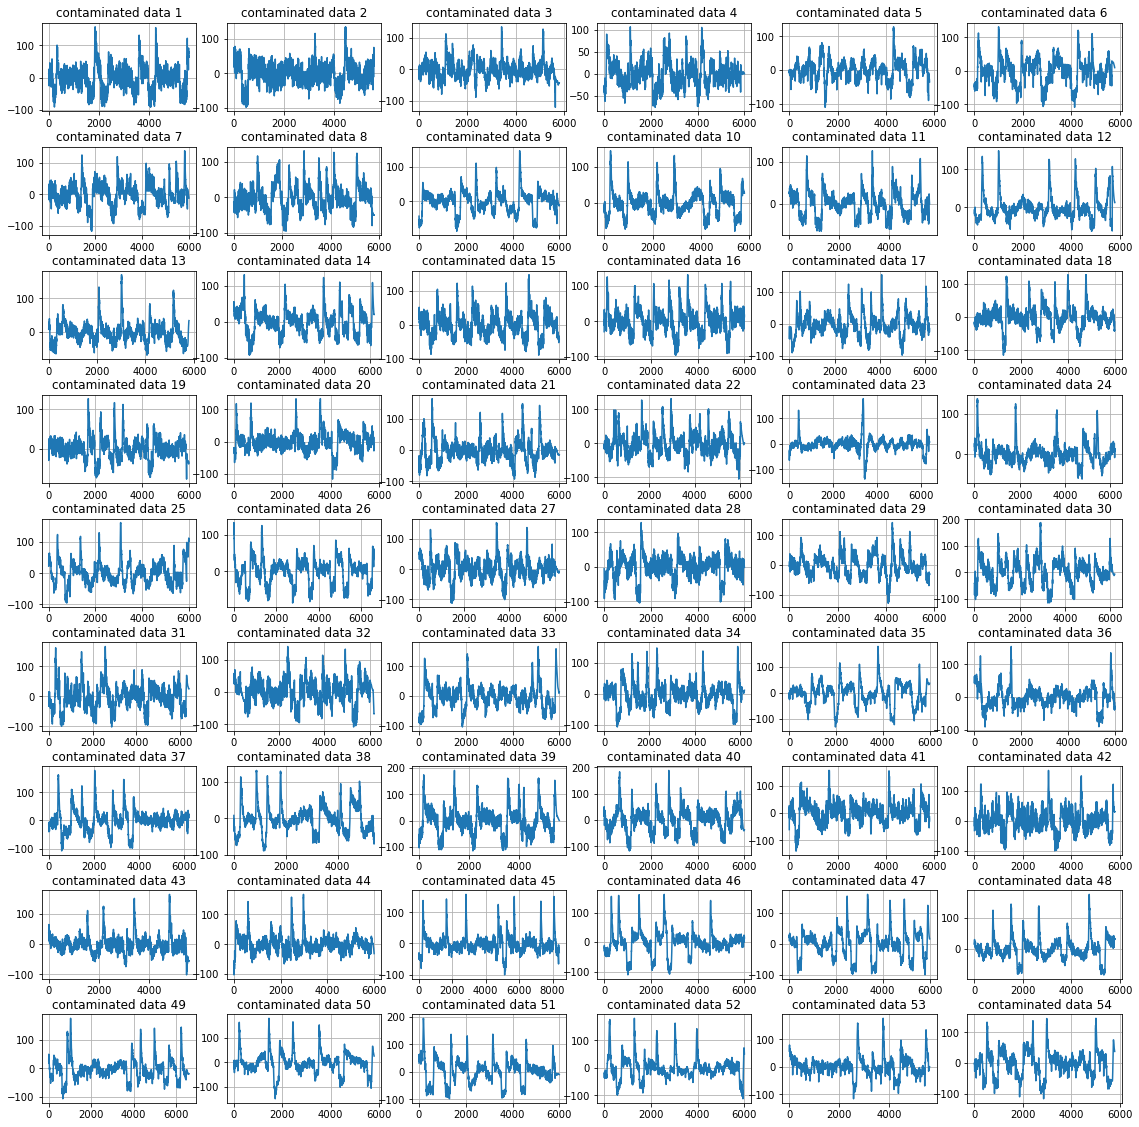

In [44]:
# Collab
# heog_dict = loadmat("HEOG.mat?raw=true")
# Jupyter
cont_data_dict = loadmat(cont_data_file)

new_cont_data = RemoveKeys(cont_data_dict)
print(new_cont_data.keys())
cont_data_list = [new_cont_data[cont_data] for cont_data in new_cont_data.keys()]
c_shapes = [ cont_data_list[i].shape[1] for i in range(0,len(cont_data_list))]
print("len heog_list: " + str( len(cont_data_list) ) )
print("len de heog mas larga: "+str( np.amax(c_shapes) ))
print("len de heog mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(cont_data_list)):
    AddPlot(cont_data_list[i][0], 9, 6, i+1, "contaminated data "+str(i+1))
plt.show()